In [36]:
# Import Important Libraries
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
from scipy.io import arff
import numpy as np
# import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [37]:
# Load the .arff file
connect_4_dataset = arff.loadarff('../connect-4.arff')

# Convert to a numpy array
data = np.asarray(connect_4_dataset[0].tolist(), dtype=np.float32)

# Print the array
print(data)


[[0. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 2.]
 ...
 [2. 2. 0. ... 0. 0. 1.]
 [2. 1. 0. ... 2. 0. 0.]
 [2. 1. 1. ... 0. 0. 0.]]


The heatmap shows the distribution of pieces on the Connect-4 board. Each cell in the heatmap represents the difference between the number of Player 1 pieces and the number of Player 2 pieces in that position. The color of each cell represents the value of this difference, with blue indicating more Player 1 pieces and red indicating more Player 2 pieces. The annotations on the heatmap show the exact values of the differences between the number of Player 1 pieces and the number of Player 2 pieces in each position. By looking at the heatmap, you can see where the majority of pieces are located on the board and which positions are more favorable for Player 1 or Player 2.

The Connect-4 board heatmap can help you understand the distribution of pieces on the board and how it relates to the outcome class. By looking at the heatmap, you can see where the majority of pieces are located on the board and which positions are more favorable for Player 1 or Player 2. This information can be useful in understanding the patterns and relationships in the dataset, which can inform the design of a machine learning model.

For example, you can use this heatmap to identify which positions on the board are most predictive of the outcome class. You can then use this information to select the most relevant features for your model and optimize its performance. Additionally, you can use the heatmap to visualize how the distribution of pieces changes over time as the game progresses, which can provide insights into the strategies used by different players and how they affect the outcome of the game. Overall, the Connect-4 board heatmap is a powerful tool for understanding the data and developing effective machine learning models.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 2. 1. 2. 1. 2. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


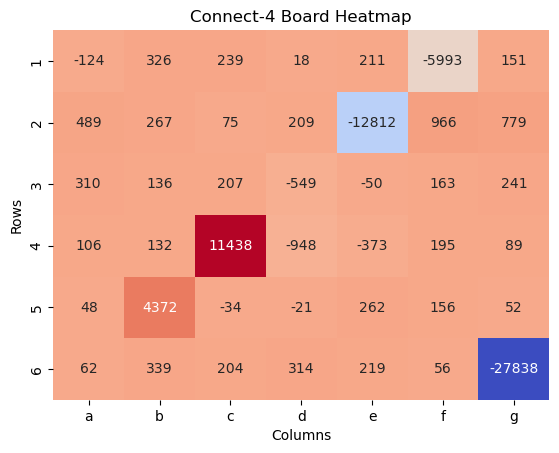

In [38]:
# !pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Create a 6x6 matrix of zeros
board = np.zeros((6, 7))

print(data[0])

# Fill in the board with the pieces from the dataset
for row in range(6):
    for col in range(7):
        # get index of position on the board
        index = row * 7 + col + 1
        
        board_state = data[:, index]
        player_1_pieces = sum(board_state == 1)
        player_2_pieces = sum(board_state == 2)
        board[row, col] = player_1_pieces - player_2_pieces

# Create a heatmap of the board
sns.heatmap(board, cmap='coolwarm', annot=True, fmt='.0f', cbar=False, xticklabels=['a', 'b', 'c', 'd', 'e', 'f', "g"], yticklabels=['1', '2', '3', '4', '5', '6'])
# Set the axis labels
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Connect-4 Board Heatmap')

# Show the plot
plt.show()


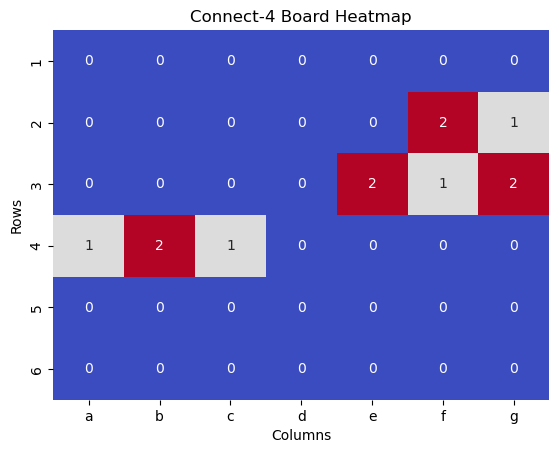

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the board positions for one game (rows 0 to 5)
board_positions = data[0, :-1].reshape((6, 7))

# Create a heatmap of the board positions
sns.heatmap(board_positions, cmap='coolwarm', annot=True, fmt='.0f', cbar=False, xticklabels=['a', 'b', 'c', 'd', 'e', 'f', "g"], yticklabels=['1', '2', '3', '4', '5', '6'])

# Set the axis labels
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Connect-4 Board Heatmap')

# Show the plot
plt.show()


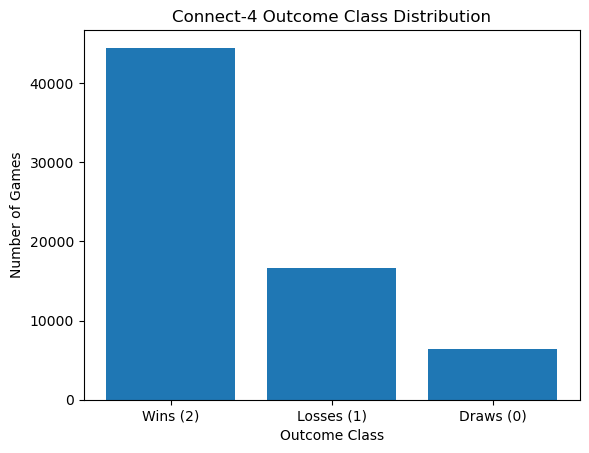

num_wins percentage 65.83033586452922
num_loss percentage 24.623651139038145
num_draws percentage 9.546012996432642


In [ ]:
import matplotlib.pyplot as plt

# Get the outcome class values
outcome_class = data[:, -1]

# Count the number of wins, losses, and draws
num_wins = sum(outcome_class == 2)
num_losses = sum(outcome_class == 1)
num_draws = sum(outcome_class == 0)

# Create a bar chart of the outcome class distribution
plt.bar(['Wins (2)', 'Losses (1)', 'Draws (0)'], [num_wins, num_losses, num_draws])
plt.xlabel('Outcome Class')
plt.ylabel('Number of Games')
plt.title('Connect-4 Outcome Class Distribution')

# Show the plot
plt.show()

print("num_wins percentage", num_wins * 100 / sum([num_wins, num_losses, num_draws]))
print("num_loss percentage", num_losses * 100 / sum([num_wins, num_losses, num_draws]))
print("num_draws percentage", num_draws * 100 / sum([num_wins, num_losses, num_draws]))
